In [31]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker
from matplotlib import pyplot as plt

In [32]:
# DB connection details
DB_URI = "sqlite:///energy.db"
engine = create_engine(DB_URI, pool_pre_ping=True)

In [33]:
SessionLocal = sessionmaker(
    autocommit=False,
    autoflush=False,
    bind=engine,
)

In [34]:
df = pd.read_csv('energy_dataset.csv')
df["time"] = pd.to_datetime(df["time"])

C:\Users\mahim\AppData\Local\Temp\ipykernel_20540\45565026.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["time"] = pd.to_datetime(df["time"])


In [35]:
# Drop columns that are not needed
df.drop(columns='total load forecast', inplace=True)
df.drop(columns='price day ahead', inplace=True)
#convert time column to datatype timestamp
# Convert time value to timestamp
df['time'] = pd.to_datetime(df['time'], utc=True).dt.tz_localize(None)
df.dtypes

time                                           datetime64[ns]
generation biomass                                    float64
generation fossil brown coal/lignite                  float64
generation fossil coal-derived gas                    float64
generation fossil gas                                 float64
generation fossil hard coal                           float64
generation fossil oil                                 float64
generation fossil oil shale                           float64
generation fossil peat                                float64
generation geothermal                                 float64
generation hydro pumped storage aggregated            float64
generation hydro pumped storage consumption           float64
generation hydro run-of-river and poundage            float64
generation hydro water reservoir                      float64
generation marine                                     float64
generation nuclear                                    float64
generati

In [36]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load actual,price actual
0,2014-12-31 23:00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,25385.0,65.41
1,2015-01-01 00:00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24382.0,64.92
2,2015-01-01 01:00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,22734.0,64.48
3,2015-01-01 02:00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,21286.0,59.32
4,2015-01-01 03:00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,20264.0,56.04


In [30]:
# Create table schema based on DataFrame columns
'''
textstr = "CREATE TABLE IF NOT EXISTS energy_load ("
for column in df.columns:
    # Determine the data type of the column
    data_type = df[column].dtype
    column = column.replace(" ", "_")  # Remove spaces from column names
    column = column.replace("/", "_")  # Remove hyphens from column names
    column = column.replace("(", "")  # Remove opening parentheses from column names
    column = column.replace(")", "")  # Remove closing parentheses from column names
    column = column.replace("%", "Pct")  # Remove percentage sign and replace with "Pct"    
    column = column.replace("-", "_")  # Remove hyphens from column names
    
    # Map Pandas data types to SQLite data types
    if str(data_type) == 'datetime64[ns]':
        sqlite_data_type = 'TIMESTAMP'
    elif str(data_type) == 'object':
        sqlite_data_type = 'TEXT'
    elif str(data_type) == 'float64':
        sqlite_data_type = 'FLOAT'
    else:
        sqlite_data_type = 'TEXT'  # Default to TEXT if data type is not recognized
    
    # Add column and data type to the table schema
    textstr += f"{column} {sqlite_data_type}, "

# Remove trailing comma and space, then close the table schema
textstr = textstr[:-2] + ")"
textstr
'''

In [74]:
#table_schema = text(textstr)
# Create table
#with SessionLocal() as session:
#    session.execute(table_schema)

In [37]:
# Insert data into table
with SessionLocal() as session:
    df.to_sql("energy_consumption", con=session.get_bind(), if_exists="append", index=False)
    session.commit()

In [38]:

# Now we have already filled the table, we can query it
with SessionLocal() as session:
    query = text(
        """
        SELECT *
        FROM energy_consumption
        """
    )
    data = session.execute(query)


In [39]:
    df = pd.DataFrame(data)
    print(df.head())

                         time  generation biomass  \
0  2014-12-31 23:00:00.000000               447.0   
1  2015-01-01 00:00:00.000000               449.0   
2  2015-01-01 01:00:00.000000               448.0   
3  2015-01-01 02:00:00.000000               438.0   
4  2015-01-01 03:00:00.000000               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                      

In [40]:
#convert time column to timestamp datatype
df['time'] = pd.to_datetime(df['time'])
df.dtypes

time                                           datetime64[ns]
generation biomass                                    float64
generation fossil brown coal/lignite                  float64
generation fossil coal-derived gas                    float64
generation fossil gas                                 float64
generation fossil hard coal                           float64
generation fossil oil                                 float64
generation fossil oil shale                           float64
generation fossil peat                                float64
generation geothermal                                 float64
generation hydro pumped storage aggregated             object
generation hydro pumped storage consumption           float64
generation hydro run-of-river and poundage            float64
generation hydro water reservoir                      float64
generation marine                                     float64
generation nuclear                                    float64
generati

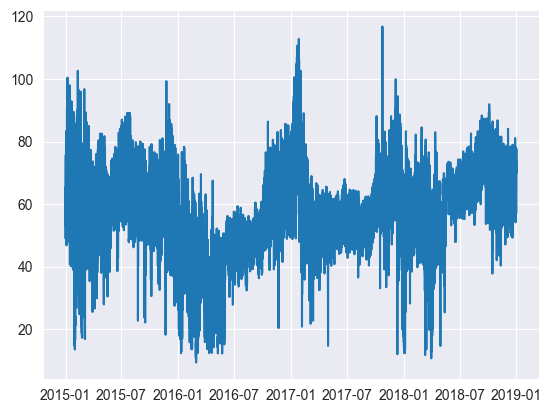

In [41]:
# Now we can plot the data using dataframe df
plt.plot(df["time"], df["price actual"])
plt.show()


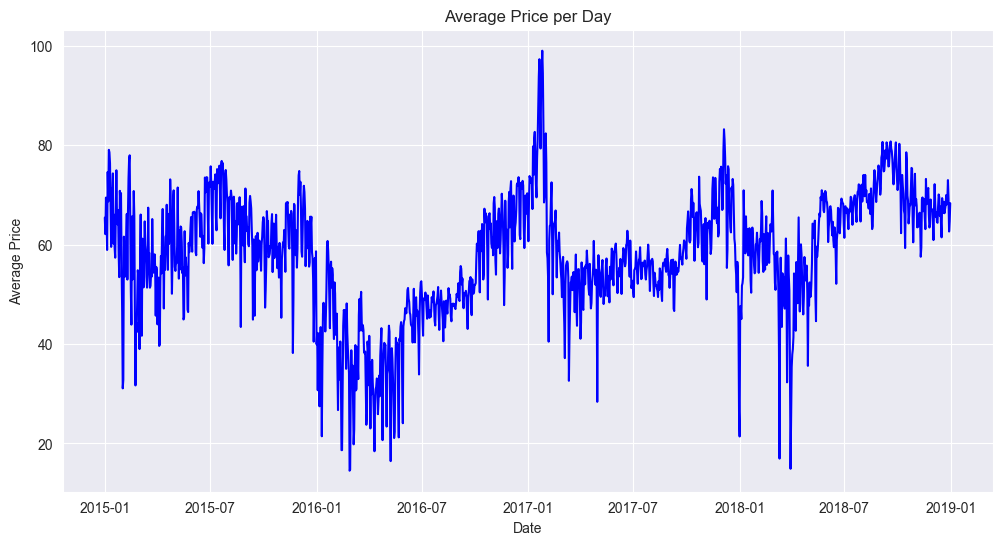

In [43]:
# Group by day and calculate the mean for each day
daily_mean = df.groupby(df['time'].dt.date).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_mean.index, daily_mean['price actual'], color='blue')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price per Day')
plt.grid(True)
plt.show()

In [44]:
df.shape

(35064, 27)

In [45]:
# check the distinct count of values for each column
df.nunique()

time                                           35064
generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8297
generation fossil hard coal                     7266
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage aggregated         0
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                              

In [46]:
# remove the columns where the distinct count is 1
df_refined = df.loc[:, df.nunique() > 1]

In [47]:
df_refined.shape

(35064, 19)

In [48]:
missing_values = df_refined.isnull().sum()
print(missing_values)

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load actual                              36
price actual                                    0
dtype: int64


In [49]:
for column in df_refined.columns:
    if df_refined[column].isnull().any():
        df_refined[column] = df_refined[column].interpolate()

C:\Users\mahim\AppData\Local\Temp\ipykernel_20540\1550214994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined[column] = df_refined[column].interpolate()


In [50]:
missing_values = df_refined.isnull().sum()
print(missing_values)

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load actual                              0
price actual                                   0
dtype: int64


In [15]:
# remove the rows where the values are null
#df_refined1 = df_refined.dropna()
#df_refined1.shape

(35018, 19)

In [51]:
df_refined1 = df_refined 
df_refined1.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load actual,price actual
0,2014-12-31 23:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,17.0,6436.0,25385.0,65.41
1,2015-01-01 00:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,16.0,5856.0,24382.0,64.92
2,2015-01-01 01:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,8.0,5454.0,22734.0,64.48
3,2015-01-01 02:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,2.0,5151.0,21286.0,59.32
4,2015-01-01 03:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,9.0,4861.0,20264.0,56.04


In [52]:
# scale the features excluding the time column

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_refined1_scaled = df_refined1.copy()
df_refined1_scaled.iloc[:, 1:] = scaler.fit_transform(df_refined1_scaled.iloc[:, 1:])
df_refined1_scaled.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load actual,price actual
0,2014-12-31 23:00:00,0.743671,-0.335844,-0.353717,0.287706,-2.596050,0.488977,0.196648,-0.385001,0.990784,-0.851151,-0.897532,-0.823732,-1.462008,0.284116,-0.847639,0.303747,-0.724094,0.529854
1,2015-01-01 00:00:00,0.767106,-0.338664,-0.193824,0.254067,-2.672213,0.560919,0.091833,-0.516325,0.990784,-0.851151,-1.039610,-0.823137,-1.481921,0.132259,-0.848235,0.121143,-0.943292,0.495356
2,2015-01-01 01:00:00,0.755388,-0.352763,-0.347812,0.165380,-2.691253,0.868883,0.001992,-0.672716,0.994354,-0.851151,-0.897532,-0.823137,-1.462008,-0.001239,-0.853004,-0.005420,-1.303451,0.464379
3,2015-01-01 02:00:00,0.638217,-0.547342,-0.594464,-0.063983,-2.634131,1.296751,-0.057902,-0.995306,0.993164,-0.851151,-0.755453,-0.823137,-1.561575,-0.070633,-0.856580,-0.100815,-1.619900,0.101098
4,2015-01-01 03:00:00,0.521046,-0.736280,-0.678044,-0.212304,-2.710294,1.704424,-0.047920,-1.027456,0.991974,-0.851151,-0.826493,-0.827899,-1.601401,-0.164921,-0.852408,-0.192118,-1.843251,-0.129825


In [53]:
df_refined1_scaled['month'] = df_refined1_scaled['time'].dt.month
df_refined1_scaled['week_of_year'] = df_refined1_scaled['time'].dt.isocalendar().week

df_refined1_scaled['month_2'] = (df_refined1_scaled['month'] + 6) % 12
df_refined1_scaled['week_of_year_2'] = (df_refined1_scaled['week_of_year'] + 26) % 52

In [58]:
# save dataframe data into sqlite database
df_refined1_scaled.to_sql('energy_set_prep', con=engine, if_exists='replace', index=False)

35064

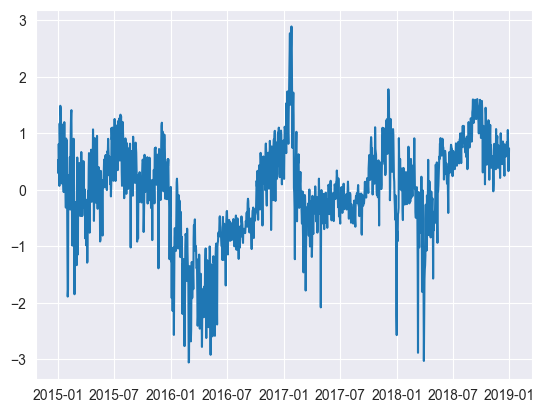

In [59]:
# plot the chart for time and price actual
daily_mean1 = df_refined1_scaled.groupby(df_refined1_scaled['time'].dt.date).mean()
plt.plot(daily_mean1.index, daily_mean1["price actual"])
plt.show()

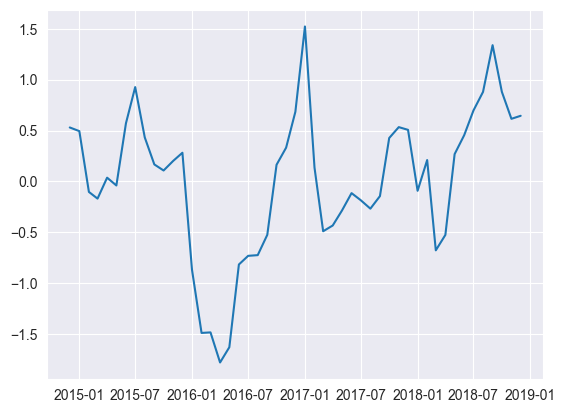

In [61]:
def plot_time_vs_price_initial() :
# plot the chart for time and price actual averaged by per month
    daily_meanx = df_refined1_scaled.groupby(df_refined1_scaled['time'].dt.to_period('M')).mean()
    daily_meanx.index = daily_meanx.index.to_timestamp()
    plt.plot(daily_meanx.index, daily_meanx["price actual"])
    plt.show()
plot_time_vs_price_initial()

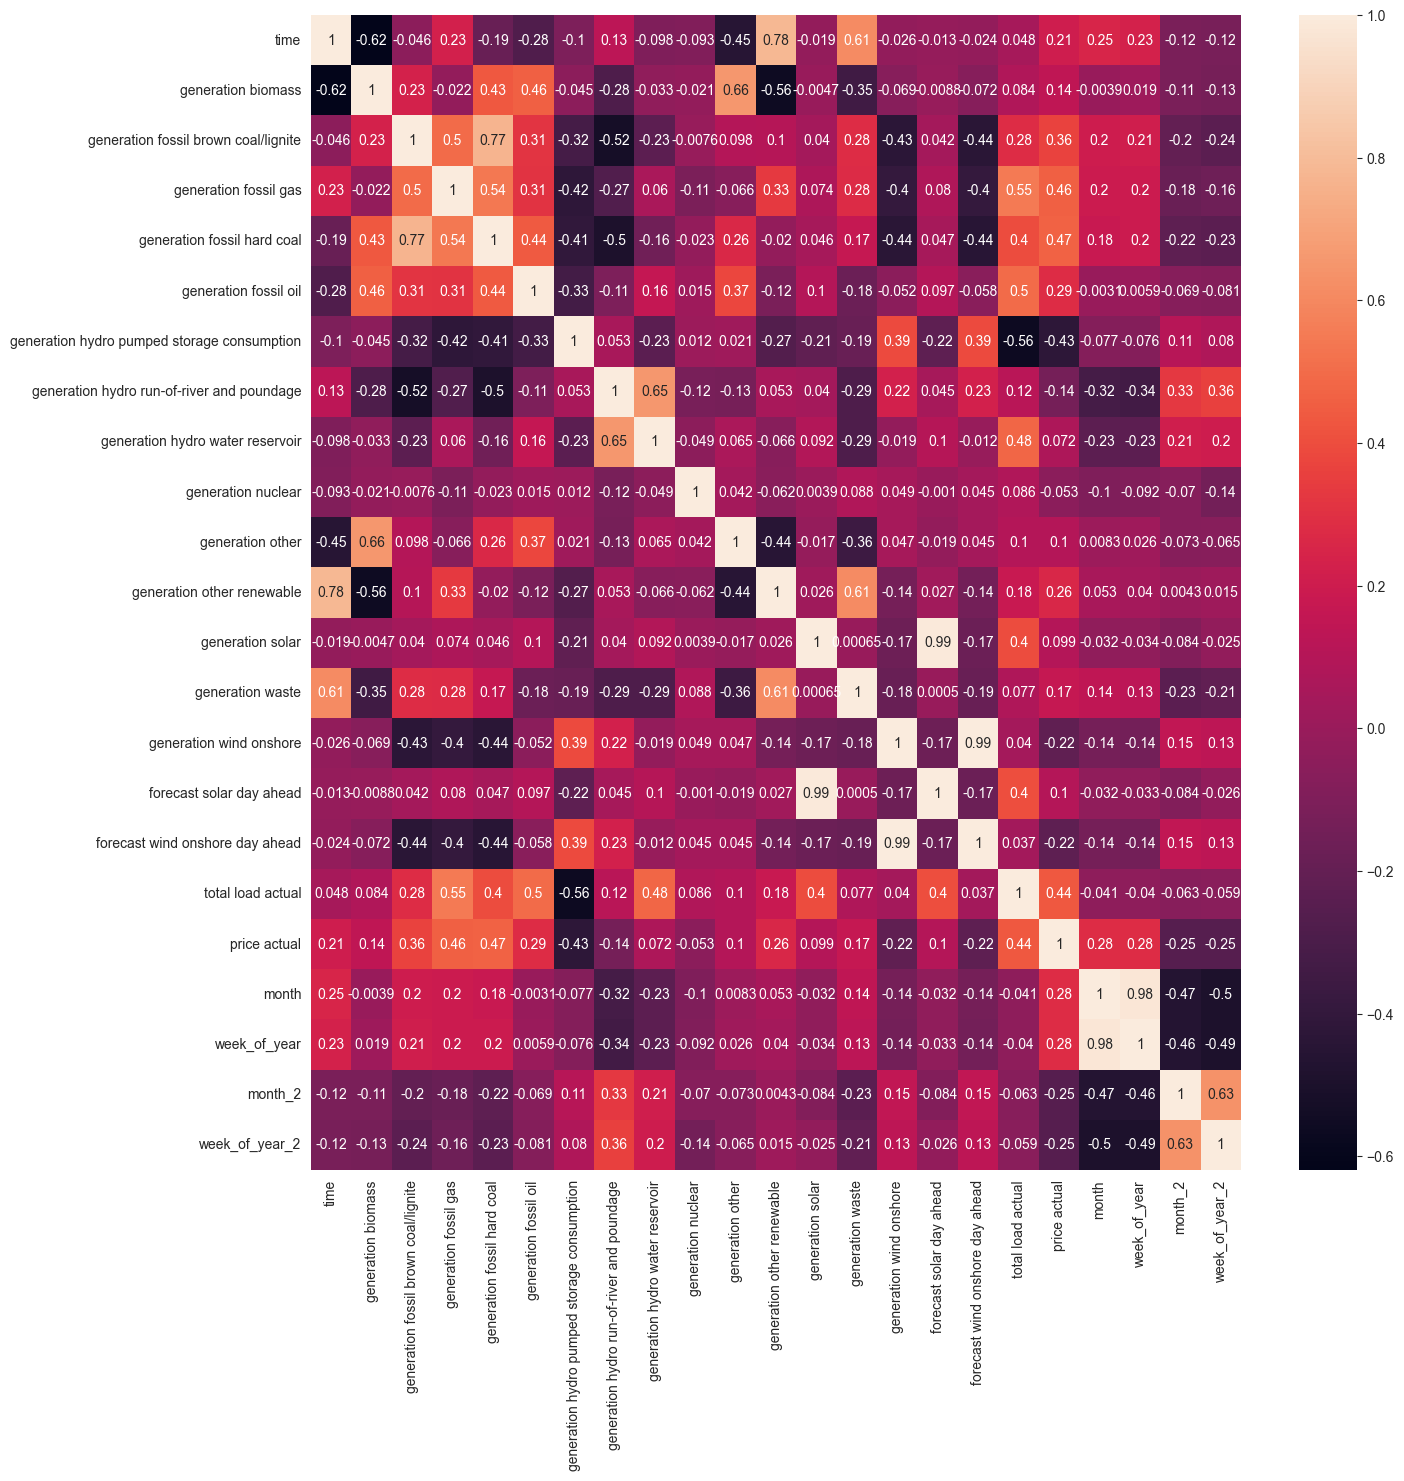

In [57]:
#plot a correlation matrix between the features in a bigger chart
import seaborn as sns
correlation_matrix = df_refined1_scaled.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()